In [1]:
import os

import skimage
import wandb
from skimage.io import imread
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load yolo v11 model

In [2]:
# Use YOLO OBB model
# This model can detect objects with oriented bounding boxes
model_oob_n = YOLO("models/yolo11n-obb.pt")
model_oob_l = YOLO("models/yolo11l-obb.pt")
model_oob_x = YOLO("models/yolo11l-obb.pt")
model_n = YOLO("models/yolo11n.pt")
model_x = YOLO("models/yolo11x.pt")

These models have been trained on the Dota dataset. see [link](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/DOTAv1.yaml)

These 15 classes are known:
  - plane
  - ship
  - storage tank
  - baseball diamond
  - tennis court
  - basketball court
  - ground track field
  - harbor
  - bridge
  - large vehicle
  - small vehicle
  - helicopter
  - roundabout
  - soccer ball field
  - swimming pool

(1342, 2500, 3)


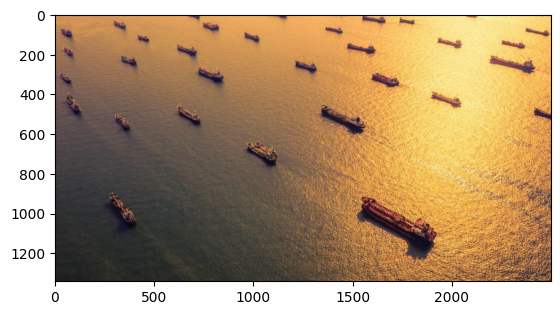

In [3]:
# load img from file system
img = imread("datasets/ships.jpeg")
# img = skimage.img_as_float(ships)
# img_tensor = torch.tensor(ships)
# print(img_tensor.shape)
# img = img_tensor.permute(2,0,1).numpy()
print(img.shape)
plt.imshow(img)

In [4]:
result_obb_n = model_oob_n(img)
result_obb_l = model_oob_l(img)
result_obb_x = model_oob_x(img)
result_n = model_n(img)
result_x = model_x(img)


0: 576x1024 63.1ms
Speed: 4.0ms preprocess, 63.1ms inference, 8.3ms postprocess per image at shape (1, 3, 576, 1024)

0: 576x1024 335.7ms
Speed: 2.4ms preprocess, 335.7ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)

0: 576x1024 336.7ms
Speed: 2.5ms preprocess, 336.7ms inference, 0.5ms postprocess per image at shape (1, 3, 576, 1024)

0: 352x640 5 boats, 14 birds, 22.6ms
Speed: 1.4ms preprocess, 22.6ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 8 boats, 200.9ms
Speed: 1.1ms preprocess, 200.9ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


In [5]:
del model_oob_n, model_oob_l, model_oob_x, model_x

Text(0.5, 1.0, 'YOLOv11_obb_x')

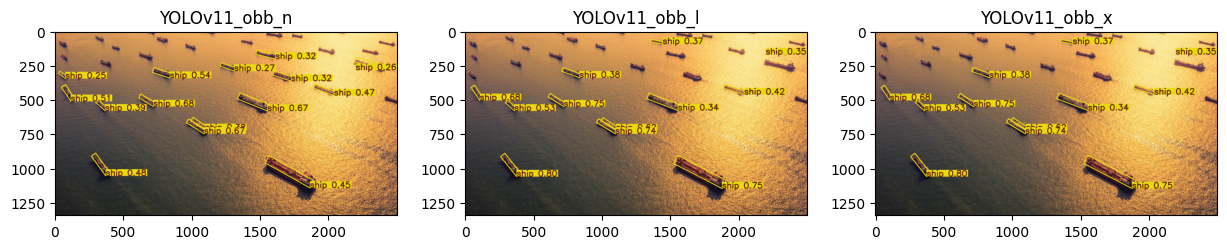

In [6]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(result_obb_n[0].plot())
plt.title("YOLOv11_obb_n")
plt.subplot(1, 3, 2)
plt.imshow(result_obb_l[0].plot())
plt.title("YOLOv11_obb_l")
plt.subplot(1, 3, 3)
plt.imshow(result_obb_x[0].plot())
plt.title("YOLOv11_obb_x")

Text(0.5, 1.0, 'YOLOv11x')

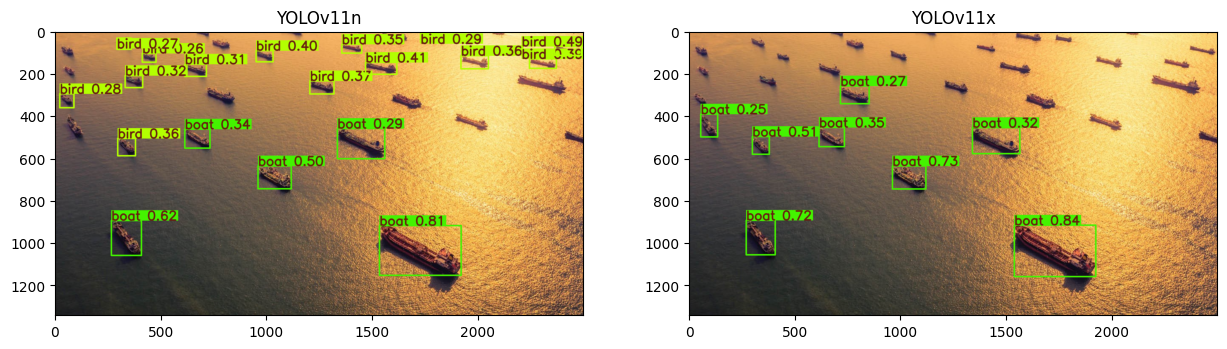

In [7]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(result_n[0].plot())
plt.title("YOLOv11n")
plt.subplot(2, 2, 2)
plt.imshow(result_x[0].plot())
plt.title("YOLOv11x")

The performance is not to good...

# Prepare the data

In [8]:
def load_images_from_folder(folder, num_images=20, bw=False):
    images = []
    for filename in os.listdir(folder)[:num_images]:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = imread(os.path.join(folder, filename))
            if img is not None:
                scaled_image = skimage.transform.resize(img, (img.shape[0] // 2, img.shape[1] // 2))
                if bw:
                    img_bw = skimage.color.rgb2gray(scaled_image)
                    images.append(img_bw)
                else:
                    images.append(scaled_image)
    return images

In [9]:
# load 5 images from the dataset
images = load_images_from_folder("datasets/images/train", num_images=5)

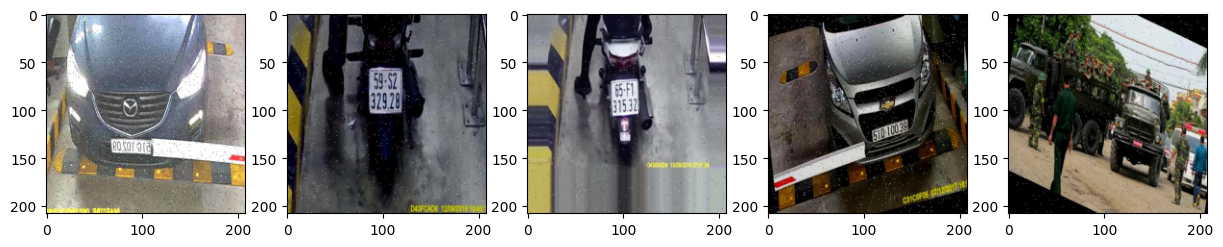

In [10]:
plt.figure(figsize=(15, 15))
for index, img in enumerate(images):
    ax = plt.subplot(5, 5, index + 1)
    ax.imshow(img)

# Train the model

In [11]:
# Resume training
# results = model_oob_x.train(resume=True)

In [12]:
results = model_n.train(
    data='license_plate.yml',  # Path to the YAML file defining the dataset
    epochs=2,                 # Number of training epochs
    imgsz=520,                 # Image size (resize images to 640x640)
    batch=8,                  # Batch size for training
    # workers=6,                 # Number of CPU workers for data loading
    # device=0,                  # Device to use (0 for GPU, 'cpu' for CPU)
    device="mps",               # use GPU
    project='runs/train',      # Directory where training results will be saved
    name='license_plate',      # Name of the run (useful for distinguishing runs)$
)

# Step 3: Print the Results
print("Training completed!")
print("Results saved at:", results.save_dir)

New https://pypi.org/project/ultralytics/8.3.37 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.36 🚀 Python-3.12.5 torch-2.5.1 MPS (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=models/yolo11n.pt, data=license_plate.yml, epochs=2, time=None, patience=100, batch=8, imgsz=520, save=True, save_period=-1, cache=False, device=mps, workers=4, project=runs/train, name=license_plate, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

train: Scanning /Users/davebrunner/Documents/repositories/TSM_CompVis/project_2/datasets/labels/train.cache... 25470 images, 18 backgrounds, 0 corrupt: 100%|██████████| 25470/25470 [00:00<?, ?it/s]
val: Scanning /Users/davebrunner/Documents/repositories/TSM_CompVis/project_2/datasets/labels/val.cache... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:00<?, ?it/s]


Plotting labels to runs/train/license_plate/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 544 train, 544 val
Using 0 dataloader workers
Logging results to runs/train/license_plate
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      3.18G      1.577      1.904      1.358         10        544:  45%|████▍     | 1421/3184 [13:04<16:13,  1.81it/s] 

KeyboardInterrupt



# Evaluate the model

In [ ]:
# Load the trained model
trained_model = YOLO('runs/train/license_plate/weights/best.pt')
# Test on an image
results = trained_model('datasets/images/test/0c756c9366a8cb10.jpg')
# Visualize results
results[0].plot()